# Programming Language Correlation in GitHub


In [1]:
import google.datalab.bigquery as bq
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd

In [2]:
%%bq tables describe --name "publicdata.samples.github_timeline"

In [3]:
table = bq.Table('publicdata.samples.github_timeline')
table.metadata.rows

6219749

In [4]:
bq.Query.from_table(table).execute(sampling=bq.Sampling.default(
    fields=['repository_name',
            'repository_language',
            'created_at',
            'type'])).result()

repository_name,repository_language,created_at,type
rails,Ruby,2012-03-20 16:15:02,ForkEvent
hw3_rottenpotatoes,Ruby,2012-03-18 05:23:17,ForkEvent
CollectorCity-Market-Place,Python,2012-04-19 08:59:56,ForkEvent
python-ping,Python,2012-04-01 06:52:44,ForkEvent
facebook-ios-sdk,Objective-C,2012-04-10 03:44:54,ForkEvent


In [5]:
%%bq query --name popular_languages
SELECT repository_language AS language, COUNT(repository_language) as pushes
FROM `publicdata.samples.github_timeline`
WHERE type = 'PushEvent'
  AND repository_language != ''
  AND CAST(created_at AS TIMESTAMP) >= TIMESTAMP("2012-01-01")
  AND CAST(created_at AS TIMESTAMP) < TIMESTAMP("2013-01-01")
GROUP BY language
ORDER BY pushes DESC
LIMIT 25

In [6]:
%%bq query --name pushes --subqueries popular_languages
SELECT timeline.actor AS user,
       timeline.repository_language AS language,
       COUNT(timeline.repository_language) AS push_count
FROM `publicdata.samples.github_timeline` AS timeline
JOIN popular_languages AS languages
  ON timeline.repository_language = languages.language
WHERE type = 'PushEvent'
  AND CAST(created_at AS TIMESTAMP) >= TIMESTAMP("2012-01-01") 
  AND CAST(created_at AS TIMESTAMP) < TIMESTAMP("2013-01-01") 
GROUP BY user, language

In [7]:
%%bq query --name pushes_sample --subqueries popular_languages pushes
SELECT user, language, push_count
FROM pushes
WHERE MOD(ABS(FARM_FINGERPRINT(user)), 100) < 5
ORDER BY push_count DESC

In [8]:
popular_languages.execute().result()

language,pushes
JavaScript,455158
Java,341750
Ruby,324837
Python,261187
PHP,246018
C++,163494
C,161677
Shell,75076
C#,60039
Objective-C,45619


In [9]:
query = pushes_sample.execute()

query.result()

user,language,push_count
clayyount,JavaScript,647
radar,Ruby,520
bhearsum,Python,470
DamonOehlman,JavaScript,430
thatch45,Python,426
kraih,Perl,406
zolex,Java,381
mjg,C,371
capensis,JavaScript,322
miltontony,Python,296


In [10]:
df = query.result().to_dataframe()

In [11]:
df[:10]

,user,language,push_count
0,clayyount,JavaScript,647
1,radar,Ruby,520
2,bhearsum,Python,470
3,DamonOehlman,JavaScript,430
4,thatch45,Python,426
5,kraih,Perl,406
6,zolex,Java,381
7,mjg,C,371
8,capensis,JavaScript,322
9,miltontony,Python,296


In [12]:
summary = df['user'].describe()

print('DataFrame contains %d with %d unique users' % (summary['count'], summary['unique']))

DataFrame contains 9793 with 7249 unique users


In [13]:
print('%s has contributions in %d languages' % (summary['top'], summary['freq']))

df[df['user'] == summary['top']]

xhochy has contributions in 9 languages


,user,language,push_count
1578,xhochy,Lua,17
2488,xhochy,Shell,11
3177,xhochy,Scala,8
4822,xhochy,Haskell,4
5299,xhochy,C,3
5463,xhochy,CoffeeScript,3
7501,xhochy,Ruby,2
8544,xhochy,JavaScript,1
8946,xhochy,Python,1


In [15]:
dfp = df.pivot(index = 'user', columns = 'language', values = 'push_count').fillna(0)
dfp

language,ActionScript,C,C#,C++,Clojure,CoffeeScript,Emacs Lisp,Erlang,Go,Groovy,...,Objective-C,PHP,Perl,Puppet,Python,R,Ruby,Scala,Shell,VimL
user,,,,,,,,,,,,,,,,,,,,,
0li,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0xPr0xy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0
0xd34df00d,0.0,0.0,0.0,235.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100kV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123ndy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1ntello,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21studios,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2bt,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30abc3f4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0


In [16]:
corr = dfp.corr(method = 'spearman')
corr

language,ActionScript,C,C#,C++,Clojure,CoffeeScript,Emacs Lisp,Erlang,Go,Groovy,...,Objective-C,PHP,Perl,Puppet,Python,R,Ruby,Scala,Shell,VimL
language,,,,,,,,,,,,,,,,,,,,,
ActionScript,1.000000,-0.019668,-0.008849,-0.018644,0.013340,-0.008979,-0.009148,-0.005480,-0.004690,-0.006332,...,0.002602,-0.021518,-0.000706,-0.005197,-0.021662,-0.004899,-0.031604,-0.009477,-0.021437,-0.011152
C,-0.019668,1.000000,-0.041722,0.091977,-0.018635,-0.022726,-0.008592,0.019320,0.001470,-0.022530,...,-0.027976,-0.078497,0.031357,-0.010882,-0.018370,-0.017433,-0.092800,-0.006119,0.043795,0.004249
C#,-0.008849,-0.041722,1.000000,-0.022566,-0.016604,-0.014728,-0.022120,-0.002714,0.000944,-0.006062,...,-0.026598,-0.055277,-0.029467,-0.012568,-0.059672,-0.011846,-0.060994,-0.022916,-0.025267,-0.036163
C++,-0.018644,0.091977,-0.022566,1.000000,-0.017171,-0.010940,-0.007680,0.013005,-0.006752,-0.021634,...,-0.033094,-0.089876,-0.012894,-0.009807,-0.023949,-0.007493,-0.109523,-0.022772,0.026046,-0.026096
Clojure,0.013340,-0.018635,-0.016604,-0.017171,1.000000,0.007950,0.072216,-0.005208,0.026872,0.017342,...,-0.014913,-0.020316,0.012820,0.023381,-0.008344,-0.004656,0.006351,-0.009006,0.009091,0.070577
CoffeeScript,-0.008979,-0.022726,-0.014728,-0.010940,0.007950,1.000000,-0.011368,-0.006810,-0.005828,0.009858,...,-0.004298,-0.023941,-0.015144,-0.006459,-0.012874,-0.006088,0.030429,0.000235,0.023398,0.026067
Emacs Lisp,-0.009148,-0.008592,-0.022120,-0.007680,0.072216,-0.011368,1.000000,-0.006938,-0.005938,-0.008016,...,-0.005141,-0.037006,0.021519,-0.006580,-0.000071,0.016456,0.012437,0.023586,0.039857,-0.005877
Erlang,-0.005480,0.019320,-0.002714,0.013005,-0.005208,-0.006810,-0.006938,1.000000,-0.003557,-0.004802,...,-0.011901,-0.017671,-0.009242,-0.003942,-0.013889,-0.003715,0.001382,-0.007187,0.019488,0.025912
Go,-0.004690,0.001470,0.000944,-0.006752,0.026872,-0.005828,-0.005938,-0.003557,1.000000,-0.004110,...,-0.010186,-0.020947,-0.007910,-0.003374,-0.001109,-0.003180,-0.018608,-0.006151,-0.013915,-0.012348


In [17]:
# Plotting helper function
def plot_correlation(data):
  min_value = 0
  max_value = 0

  for i in range(len(data.columns)):
    for j in range(len(data.columns)):
      if i != j:
        min_value = min(min_value, data.iloc[i, j])
        max_value = max(max_value, data.iloc[i, j])
  span = max(abs(min_value), abs(max_value))
  span = round(span + .05, 1)

  items = data.columns.tolist()
  ticks = np.arange(0.5, len(items) + 0.5)

  plot.figure(figsize = (11, 7))
  plot.pcolor(data.values, cmap = 'RdBu', vmin = -span, vmax = span)
  plot.colorbar().set_label('correlation')
  plot.xticks(ticks, items, rotation = 'vertical')
  plot.yticks(ticks, items)
  plot.show()

/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


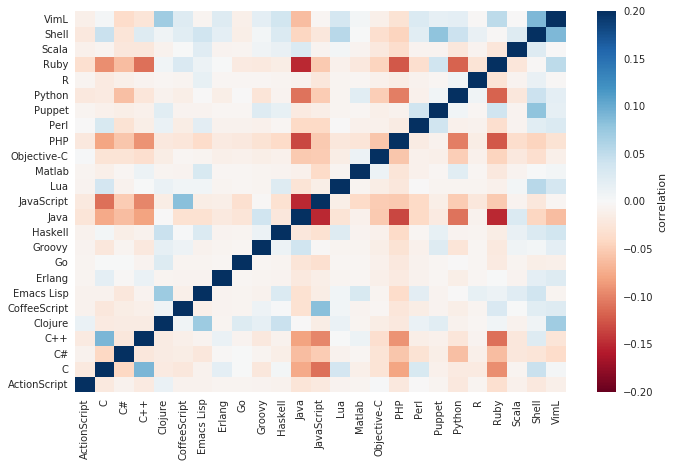

In [18]:
plot_correlation(corr)